In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
data = pd.read_csv('crash_data_queensland_1_crash_locations.csv')

/tmp/ipykernel_478242/2760894780.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


<Axes: >

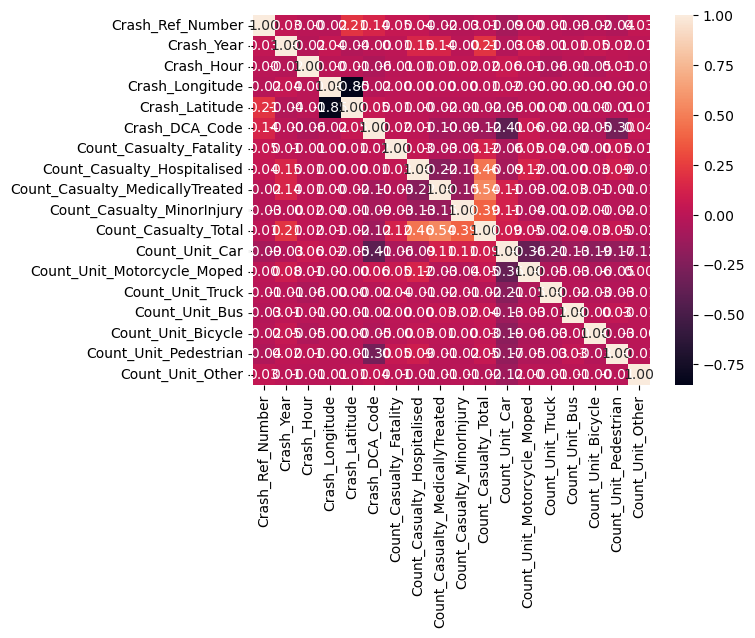

In [3]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")


In [4]:
def mtn(x):
    months = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    a = x.strip()[:3].lower()
    try:
        ez = months[a]
        return ez
    except:
        raise ValueError('Not a month')

def dy(x):
    days = {
        'mon': 1,
        'tue': 2,
        'wed': 3,
        'thu':4,
         'fri':5,
         'sat':6,
         'sun':7,
        }
    a = x.strip()[:3].lower()
    try:
        ez = days[a]
        return ez
    except:
        raise ValueError('Not a day')       
        
def sev(x):
    state = {
        'pro': 1,
        'min': 2,
        'hos': 3,
        'med':4,
         'fat':5,
        }
    a = x.strip()[:3].lower()
    try:
        ez = state[a]
        return ez
    except:
        raise ValueError('Not a state')

        
def speed(x):
    
    if x == "0 - 50 km/h":
        return 1
    if x == "60 km/h":
        return 2
    if x == "70 km/h":
        return 3
    if x == "80 - 90 km/h":
        return 4
    if x == "100 - 110 km/h":
        return 5
               

In [5]:
data['Crash_Month'] = data['Crash_Month'].apply(mtn)

In [6]:
data['Crash_Day_Of_Week'] = data['Crash_Day_Of_Week'].apply(dy)

In [7]:
data['Crash_Speed_Limit'] = data['Crash_Speed_Limit'].apply(speed)

In [8]:
data['Crash_Severity'] = data['Crash_Severity'].apply(sev)

In [9]:
one_hot = pd.get_dummies(data['Crash_Nature'])
data = data.drop('Crash_Nature', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Type'])

one_hot['Hit_pedestrian']= one_hot['Hit pedestrian']
one_hot = one_hot.drop('Hit pedestrian', axis=1)
one_hot = one_hot.drop('Other', axis =1)
data = data.drop('Crash_Type', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Loc_ABS_Remoteness'])
data = data.drop('Loc_ABS_Remoteness', axis=1)
data = data.join(one_hot)
 

data = data.drop('Other', axis=1)
one_hot = pd.get_dummies(data['Crash_Controlling_Authority'])
data = data.drop('Crash_Controlling_Authority', axis=1)
data = data.join(one_hot)


one_hot = pd.get_dummies(data['Crash_Roadway_Feature'])
data = data.drop('Crash_Roadway_Feature', axis=1)
one_hot = one_hot.drop('Other', axis =1)
data = data.join(one_hot)

data = data.drop('Other', axis=1)
data = data.drop('Miscellaneous', axis=1)
data = data.drop('No Roadway Feature', axis=1)

one_hot = pd.get_dummies(data['Crash_Traffic_Control'])

data = data.drop('Crash_Traffic_Control', axis=1)
one_hot = one_hot.drop('Miscellaneous', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Road_Surface_Condition'])
data = data.drop('Crash_Road_Surface_Condition', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Atmospheric_Condition'])
data = data.drop('Crash_Atmospheric_Condition', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Road_Horiz_Align'])
data = data.drop('Crash_Road_Horiz_Align', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Road_Vert_Align'])
data = data.drop('Crash_Road_Vert_Align', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['DCA_Key_Approach_Dir'])
data = data.drop('DCA_Key_Approach_Dir', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Lighting_Condition'])
data = data.drop('Crash_Lighting_Condition', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)


In [10]:
data = data.drop('Crash_Street', axis=1)
data = data.drop('Crash_Street_Intersecting', axis=1)
data = data.drop('State_Road_Name', axis=1)
data = data.drop('Loc_Post_Code', axis=1)
data = data.drop('Loc_Queensland_Transport_Region', axis=1)
data = data.drop('Loc_Police_Division', axis=1)
data = data.drop('Loc_Main_Roads_Region', axis=1)
data = data.drop('Loc_ABS_Statistical_Area_2', axis=1)
data = data.drop('Loc_ABS_Statistical_Area_4', axis=1)
data = data.drop('Loc_State_Electorate', axis=1)
data = data.drop('Loc_Federal_Electorate', axis=1)
data = data.drop('Count_Casualty_MedicallyTreated', axis=1)
data = data.drop('Count_Casualty_MinorInjury', axis=1)
data = data.drop('Count_Casualty_Total', axis=1)
data = data.drop('Crash_Ref_Number', axis=1)

data = data.drop('Loc_Suburb', axis=1)
data = data.drop('Loc_Local_Government_Area', axis=1)
data = data.drop('Loc_Police_Region', axis=1)
data = data.drop('Loc_Police_District', axis=1)
data = data.drop('Loc_ABS_Statistical_Area_3', axis=1)
data = data.drop('Crash_DCA_Code', axis=1)
data = data.drop('Crash_DCA_Description', axis=1)
data = data.drop('Crash_DCA_Group_Description', axis=1)
data = data.drop('Count_Casualty_Fatality', axis=1)
data = data.drop('Count_Casualty_Hospitalised', axis=1)

data = data.drop('Count_Unit_Car', axis=1)
data = data.drop('Count_Unit_Motorcycle_Moped', axis=1)
data = data.drop('Count_Unit_Truck', axis=1)
data = data.drop('Count_Unit_Bus', axis=1)
data = data.drop('Count_Unit_Bicycle', axis=1)
data = data.drop('Count_Unit_Pedestrian', axis=1)
data = data.drop('Count_Unit_Other', axis=1)


In [11]:
data

,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Longitude,Crash_Latitude,Crash_Speed_Limit,Angle,Collision - miscellaneous,...,E,N,P,S,U,W,Darkness - Lighted,Darkness - Not lighted,Dawn/Dusk,Daylight
0,3,2001,1,1,6,153.052207,-27.586358,1.0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,2001,1,3,9,153.064920,-27.595907,2.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,2001,1,4,8,153.058444,-27.599409,2.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,2001,1,7,8,153.081083,-27.598882,2.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,2001,1,2,16,0.000009,-0.000010,2.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217339,4,2012,10,2,11,152.697953,-25.539892,1.0,0,0,...,0,0,0,1,0,0,0,0,0,1
217340,3,2012,10,6,23,152.658259,-25.626030,4.0,0,0,...,1,0,0,0,0,0,0,1,0,0
217341,3,2012,10,1,16,152.629622,-25.654239,1.0,0,0,...,0,1,0,0,0,0,0,0,0,1
217342,4,2012,10,2,13,152.694024,-25.537150,2.0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [217]:
data.columns

Index(['Unnamed: 0', 'Crash_Severity', 'Crash_Year', 'Crash_Month',
       'Crash_Day_Of_Week', 'Crash_Hour', 'Crash_Longitude', 'Crash_Latitude',
       'Crash_Speed_Limit', 'Angle', 'Collision - miscellaneous',
       'Fall from vehicle', 'Head-on', 'Hit animal', 'Hit object',
       'Hit parked vehicle', 'Hit pedestrian', 'Non-collision - miscellaneous',
       'Overturned', 'Rear-end', 'Sideswipe', 'Struck by external load',
       'Struck by internal load', 'Multi-Vehicle', 'Single Vehicle',
       'Hit_pedestrian', 'Inner Regional', 'Major Cities', 'Outer Regional',
       'Remote', 'Unknown', 'Locally-controlled', 'Not coded',
       'State-controlled', 'Bikeway', 'Bridge/Causeway',
       'Forestry/National Park Road', 'Intersection - 5+ way',
       'Intersection - Cross', 'Intersection - Interchange',
       'Intersection - Multiple Road', 'Intersection - Roundabout',
       'Intersection - T-Junction', 'Intersection - Y-Junction',
       'Median Opening', 'Merge Lane', 'Rail

In [218]:
data = pd.read_csv('Numerical_crash_data')
X_train =data.drop('Crash_Severity', axis =1)


In [14]:
a = data.corr()

In [214]:
data = data.dropna()

In [215]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [219]:
train_data, val_data = train_test_split(X_train, test_size=0.2, random_state=42)

In [220]:
input_dim = train_data.shape[1]  # Number of features in your data
encoding_dim = 32  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder_layer1 = Dense(64, activation='relu')(input_layer)
encoder_layer2 = Dense(32, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)

# Define the decoding layers
decoder_layer1 = Dense(32, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(64, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)

In [118]:
input_dim = X_train.shape[1]  # Number of features in your data
encoding_dim = 85  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layer
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoding layer
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)


In [221]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(train_data, train_data, epochs=300, batch_size=64, shuffle=True, validation_data=(val_data, val_data))


Epoch 1/300
2717/2717 [==============================] - 4s 1ms/step - loss: 182995504.0000 - val_loss: 183689712.0000
Epoch 2/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995776.0000 - val_loss: 183689712.0000
Epoch 3/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995600.0000 - val_loss: 183689712.0000
Epoch 4/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995488.0000 - val_loss: 183689712.0000
Epoch 5/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995424.0000 - val_loss: 183689712.0000
Epoch 6/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995504.0000 - val_loss: 183689712.0000
Epoch 7/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995360.0000 - val_loss: 183689712.0000
Epoch 8/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995600.0000 - val_loss: 183689712.0000
Epoch 9/300
2717/2717 [=========================

2717/2717 [==============================] - 3s 1ms/step - loss: 182995648.0000 - val_loss: 183689712.0000
Epoch 138/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995504.0000 - val_loss: 183689712.0000
Epoch 139/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995424.0000 - val_loss: 183689712.0000
Epoch 140/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995568.0000 - val_loss: 183689712.0000
Epoch 141/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995504.0000 - val_loss: 183689712.0000
Epoch 142/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995792.0000 - val_loss: 183689712.0000
Epoch 143/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995552.0000 - val_loss: 183689712.0000
Epoch 144/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995568.0000 - val_loss: 183689712.0000
Epoch 145/300
2717/2717 [=====================

Epoch 205/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995728.0000 - val_loss: 183689712.0000
Epoch 206/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995552.0000 - val_loss: 183689712.0000
Epoch 207/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995456.0000 - val_loss: 183689712.0000
Epoch 208/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995488.0000 - val_loss: 183689712.0000
Epoch 209/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995472.0000 - val_loss: 183689712.0000
Epoch 210/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995504.0000 - val_loss: 183689712.0000
Epoch 211/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995680.0000 - val_loss: 183689712.0000
Epoch 212/300
2717/2717 [==============================] - 3s 1ms/step - loss: 182995536.0000 - val_loss: 183689712.0000
Epoch 213/300
2717/2717 [=======

1359/1359 [==============================] - 1s 557us/step
Mean Squared Error (MSE): 183689827.35515782
Standard Deviation (SD) of MSE: 163606368.97887102


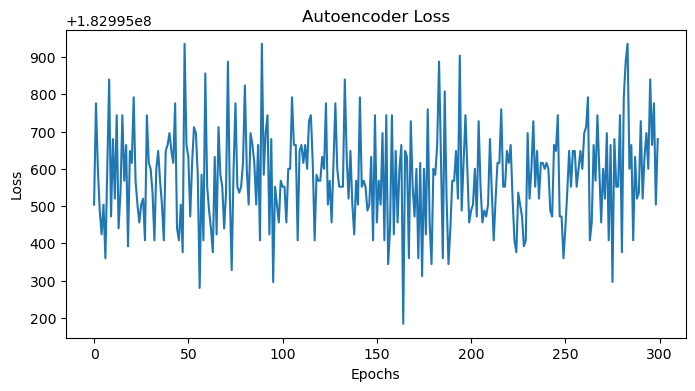

In [223]:
# Reconstruct the input data using the trained autoencoder
reconstructed_data = autoencoder.predict(val_data)

# Calculate the reconstruction loss
mse = np.mean(np.power(val_data - reconstructed_data, 2), axis=1)

# Print the mean and standard deviation of the reconstruction loss
print("Mean Squared Error (MSE):", np.mean(mse))
print("Standard Deviation (SD) of MSE:", np.std(mse))

# Plot the loss and accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [126]:
reconstructed_data[:1]

array([[0.0000000e+00, 2.4974248e-23, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        3.1483926e-31, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 7.9616855e-14, 0.0000000e+00, 1.0000000e+00,
        3.5128959e-12, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 0.0000000e

In [125]:
X_test[:1]

,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Longitude,Crash_Latitude,Crash_Speed_Limit,Angle,Collision - miscellaneous,Fall from vehicle,...,E,N,P,S,U,W,Darkness - Lighted,Darkness - Not lighted,Dawn/Dusk,Daylight
160453,2013,2,4,17,153.042287,-26.636217,3.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


1019/1019 [==============================] - 1s 565us/step
Validation Set Mean Squared Error (MSE): 47671.42052571318
Validation Set Standard Deviation (SD) of MSE: 223.57714049866618


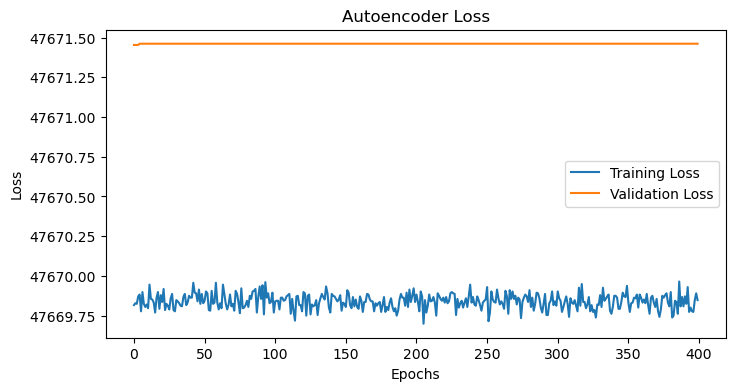

In [115]:
reconstructed_val_data = autoencoder.predict(val_data)

# Calculate the reconstruction loss for the validation set
mse_val = np.mean(np.power(val_data - reconstructed_val_data, 2), axis=1)

# Print the mean and standard deviation of the validation set reconstruction loss
print("Validation Set Mean Squared Error (MSE):", np.mean(mse_val))
print("Validation Set Standard Deviation (SD) of MSE:", np.std(mse_val))

# Plot the loss and accuracy graph for both training and validation sets
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
input_dim

85

In [164]:
d = {'col1': [1,2,3,4,5,6,7,8,9,10], 'col2':[20,40,60,80,100,120,140,160,180,200], 'col3':[1,1,1,1,1,1,1,1,1,1]}
df = pd.DataFrame(data=d)

In [165]:
df

,col1,col2,col3
0,1,20,1
1,2,40,1
2,3,60,1
3,4,80,1
4,5,100,1
5,6,120,1
6,7,140,1
7,8,160,1
8,9,180,1
9,10,200,1


In [170]:
input_dim = df.shape[1]  # Number of features in your data
encoding_dim = 2  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layer
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoding layer
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)


In [187]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(df, df, epochs=2000, batch_size=2, shuffle=True,val)


Epoch 1/2000
5/5 [==============================] - 0s 1ms/step - loss: 5073.6699
Epoch 2/2000
5/5 [==============================] - 0s 1ms/step - loss: 5073.2124
Epoch 3/2000
5/5 [==============================] - 0s 1ms/step - loss: 5071.9756
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 5070.0181
Epoch 5/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.9111
Epoch 6/2000
5/5 [==============================] - 0s 980us/step - loss: 5069.8931
Epoch 7/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8857
Epoch 8/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8770
Epoch 9/2000
5/5 [==============================] - 0s 925us/step - loss: 5069.8696
Epoch 10/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8667
Epoch 11/2000
5/5 [==============================] - 0s 968us/step - loss: 5069.8633
Epoch 12/2000
5/5 [==============================] - 0s 953us/step - loss: 5069.8633
Epoch

5/5 [==============================] - 0s 966us/step - loss: 5069.8345
Epoch 195/2000
5/5 [==============================] - 0s 908us/step - loss: 5069.8345
Epoch 196/2000
5/5 [==============================] - 0s 852us/step - loss: 5069.8345
Epoch 197/2000
5/5 [==============================] - 0s 950us/step - loss: 5069.8345
Epoch 198/2000
5/5 [==============================] - 0s 965us/step - loss: 5069.8345
Epoch 199/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8345
Epoch 200/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8340
Epoch 201/2000
5/5 [==============================] - 0s 935us/step - loss: 5069.8340
Epoch 202/2000
5/5 [==============================] - 0s 925us/step - loss: 5069.8340
Epoch 203/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8345
Epoch 204/2000
5/5 [==============================] - 0s 974us/step - loss: 5069.8340
Epoch 205/2000
5/5 [==============================] - 0s 970us/step - loss:

5/5 [==============================] - 0s 908us/step - loss: 5069.8335
Epoch 291/2000
5/5 [==============================] - 0s 976us/step - loss: 5069.8335
Epoch 292/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 293/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 294/2000
5/5 [==============================] - 0s 918us/step - loss: 5069.8335
Epoch 295/2000
5/5 [==============================] - 0s 983us/step - loss: 5069.8340
Epoch 296/2000
5/5 [==============================] - 0s 965us/step - loss: 5069.8335
Epoch 297/2000
5/5 [==============================] - 0s 925us/step - loss: 5069.8335
Epoch 298/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 299/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 300/2000
5/5 [==============================] - 0s 900us/step - loss: 5069.8335
Epoch 301/2000
5/5 [==============================] - 0s 1ms/step - loss: 506

5/5 [==============================] - 0s 892us/step - loss: 5069.8335
Epoch 387/2000
5/5 [==============================] - 0s 960us/step - loss: 5069.8335
Epoch 388/2000
5/5 [==============================] - 0s 944us/step - loss: 5069.8335
Epoch 389/2000
5/5 [==============================] - 0s 876us/step - loss: 5069.8335
Epoch 390/2000
5/5 [==============================] - 0s 861us/step - loss: 5069.8340
Epoch 391/2000
5/5 [==============================] - 0s 956us/step - loss: 5069.8335
Epoch 392/2000
5/5 [==============================] - 0s 890us/step - loss: 5069.8335
Epoch 393/2000
5/5 [==============================] - 0s 949us/step - loss: 5069.8335
Epoch 394/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 395/2000
5/5 [==============================] - 0s 927us/step - loss: 5069.8335
Epoch 396/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 397/2000
5/5 [==============================] - 0s 1ms/step - loss:

5/5 [==============================] - 0s 969us/step - loss: 5069.8330
Epoch 579/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 580/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 581/2000
5/5 [==============================] - 0s 911us/step - loss: 5069.8335
Epoch 582/2000
5/5 [==============================] - 0s 971us/step - loss: 5069.8330
Epoch 583/2000
5/5 [==============================] - 0s 917us/step - loss: 5069.8335
Epoch 584/2000
5/5 [==============================] - 0s 964us/step - loss: 5069.8335
Epoch 585/2000
5/5 [==============================] - 0s 957us/step - loss: 5069.8330
Epoch 586/2000
5/5 [==============================] - 0s 910us/step - loss: 5069.8335
Epoch 587/2000
5/5 [==============================] - 0s 902us/step - loss: 5069.8335
Epoch 588/2000
5/5 [==============================] - 0s 946us/step - loss: 5069.8335
Epoch 589/2000
5/5 [==============================] - 0s 881us/step - los

5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 675/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 676/2000
5/5 [==============================] - 0s 916us/step - loss: 5069.8330
Epoch 677/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 678/2000
5/5 [==============================] - 0s 832us/step - loss: 5069.8335
Epoch 679/2000
5/5 [==============================] - 0s 828us/step - loss: 5069.8335
Epoch 680/2000
5/5 [==============================] - 0s 969us/step - loss: 5069.8335
Epoch 681/2000
5/5 [==============================] - 0s 884us/step - loss: 5069.8335
Epoch 682/2000
5/5 [==============================] - 0s 874us/step - loss: 5069.8330
Epoch 683/2000
5/5 [==============================] - 0s 997us/step - loss: 5069.8335
Epoch 684/2000
5/5 [==============================] - 0s 936us/step - loss: 5069.8335
Epoch 685/2000
5/5 [==============================] - 0s 974us/step - loss:

Epoch 770/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 771/2000
5/5 [==============================] - 0s 996us/step - loss: 5069.8335
Epoch 772/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 773/2000
5/5 [==============================] - 0s 879us/step - loss: 5069.8335
Epoch 774/2000
5/5 [==============================] - 0s 900us/step - loss: 5069.8330
Epoch 775/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 776/2000
5/5 [==============================] - 0s 917us/step - loss: 5069.8330
Epoch 777/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 778/2000
5/5 [==============================] - 0s 945us/step - loss: 5069.8330
Epoch 779/2000
5/5 [==============================] - 0s 917us/step - loss: 5069.8335
Epoch 780/2000
5/5 [==============================] - 0s 927us/step - loss: 5069.8335
Epoch 781/2000
5/5 [==============================] - 0s 981us

Epoch 866/2000
5/5 [==============================] - 0s 887us/step - loss: 5069.8330
Epoch 867/2000
5/5 [==============================] - 0s 888us/step - loss: 5069.8330
Epoch 868/2000
5/5 [==============================] - 0s 863us/step - loss: 5069.8335
Epoch 869/2000
5/5 [==============================] - 0s 899us/step - loss: 5069.8330
Epoch 870/2000
5/5 [==============================] - 0s 943us/step - loss: 5069.8330
Epoch 871/2000
5/5 [==============================] - 0s 899us/step - loss: 5069.8335
Epoch 872/2000
5/5 [==============================] - 0s 882us/step - loss: 5069.8330
Epoch 873/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 874/2000
5/5 [==============================] - 0s 943us/step - loss: 5069.8330
Epoch 875/2000
5/5 [==============================] - 0s 893us/step - loss: 5069.8330
Epoch 876/2000
5/5 [==============================] - 0s 991us/step - loss: 5069.8330
Epoch 877/2000
5/5 [==============================] - 0s

5/5 [==============================] - 0s 849us/step - loss: 5069.8330
Epoch 1057/2000
5/5 [==============================] - 0s 937us/step - loss: 5069.8335
Epoch 1058/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1059/2000
5/5 [==============================] - 0s 899us/step - loss: 5069.8335
Epoch 1060/2000
5/5 [==============================] - 0s 960us/step - loss: 5069.8330
Epoch 1061/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 1062/2000
5/5 [==============================] - 0s 983us/step - loss: 5069.8330
Epoch 1063/2000
5/5 [==============================] - 0s 906us/step - loss: 5069.8330
Epoch 1064/2000
5/5 [==============================] - 0s 983us/step - loss: 5069.8335
Epoch 1065/2000
5/5 [==============================] - 0s 903us/step - loss: 5069.8335
Epoch 1066/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1067/2000
5/5 [==============================] - 0s 875us/s

5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1246/2000
5/5 [==============================] - 0s 998us/step - loss: 5069.8335
Epoch 1247/2000
5/5 [==============================] - 0s 904us/step - loss: 5069.8330
Epoch 1248/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1249/2000
5/5 [==============================] - 0s 905us/step - loss: 5069.8330
Epoch 1250/2000
5/5 [==============================] - 0s 931us/step - loss: 5069.8330
Epoch 1251/2000
5/5 [==============================] - 0s 992us/step - loss: 5069.8335
Epoch 1252/2000
5/5 [==============================] - 0s 933us/step - loss: 5069.8330
Epoch 1253/2000
5/5 [==============================] - 0s 865us/step - loss: 5069.8330
Epoch 1254/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1255/2000
5/5 [==============================] - 0s 945us/step - loss: 5069.8330
Epoch 1256/2000
5/5 [==============================] - 0s 930us/s

5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1341/2000
5/5 [==============================] - 0s 912us/step - loss: 5069.8330
Epoch 1342/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1343/2000
5/5 [==============================] - 0s 936us/step - loss: 5069.8330
Epoch 1344/2000
5/5 [==============================] - 0s 939us/step - loss: 5069.8330
Epoch 1345/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1346/2000
5/5 [==============================] - 0s 944us/step - loss: 5069.8330
Epoch 1347/2000
5/5 [==============================] - 0s 877us/step - loss: 5069.8330
Epoch 1348/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1349/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1350/2000
5/5 [==============================] - 0s 998us/step - loss: 5069.8330
Epoch 1351/2000
5/5 [==============================] - 0s 1ms/step - 

5/5 [==============================] - 0s 910us/step - loss: 5069.8335
Epoch 1436/2000
5/5 [==============================] - 0s 925us/step - loss: 5069.8335
Epoch 1437/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1438/2000
5/5 [==============================] - 0s 950us/step - loss: 5069.8335
Epoch 1439/2000
5/5 [==============================] - 0s 974us/step - loss: 5069.8335
Epoch 1440/2000
5/5 [==============================] - 0s 970us/step - loss: 5069.8330
Epoch 1441/2000
5/5 [==============================] - 0s 999us/step - loss: 5069.8330
Epoch 1442/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1443/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1444/2000
5/5 [==============================] - 0s 893us/step - loss: 5069.8330
Epoch 1445/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1446/2000
5/5 [==============================] - 0s 973us/ste

Epoch 1530/2000
5/5 [==============================] - 0s 948us/step - loss: 5069.8330
Epoch 1531/2000
5/5 [==============================] - 0s 886us/step - loss: 5069.8335
Epoch 1532/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 1533/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1534/2000
5/5 [==============================] - 0s 886us/step - loss: 5069.8335
Epoch 1535/2000
5/5 [==============================] - 0s 955us/step - loss: 5069.8330
Epoch 1536/2000
5/5 [==============================] - 0s 903us/step - loss: 5069.8330
Epoch 1537/2000
5/5 [==============================] - 0s 916us/step - loss: 5069.8330
Epoch 1538/2000
5/5 [==============================] - 0s 962us/step - loss: 5069.8330
Epoch 1539/2000
5/5 [==============================] - 0s 871us/step - loss: 5069.8330
Epoch 1540/2000
5/5 [==============================] - 0s 890us/step - loss: 5069.8330
Epoch 1541/2000
5/5 [==========================

5/5 [==============================] - 0s 960us/step - loss: 5069.8335
Epoch 1720/2000
5/5 [==============================] - 0s 984us/step - loss: 5069.8330
Epoch 1721/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1722/2000
5/5 [==============================] - 0s 972us/step - loss: 5069.8335
Epoch 1723/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1724/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1725/2000
5/5 [==============================] - 0s 925us/step - loss: 5069.8330
Epoch 1726/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1727/2000
5/5 [==============================] - 0s 925us/step - loss: 5069.8330
Epoch 1728/2000
5/5 [==============================] - 0s 950us/step - loss: 5069.8330
Epoch 1729/2000
5/5 [==============================] - 0s 987us/step - loss: 5069.8330
Epoch 1730/2000
5/5 [==============================] - 0s 953us/ste

5/5 [==============================] - 0s 968us/step - loss: 5069.8330
Epoch 1815/2000
5/5 [==============================] - 0s 997us/step - loss: 5069.8330
Epoch 1816/2000
5/5 [==============================] - 0s 939us/step - loss: 5069.8330
Epoch 1817/2000
5/5 [==============================] - 0s 928us/step - loss: 5069.8330
Epoch 1818/2000
5/5 [==============================] - 0s 991us/step - loss: 5069.8330
Epoch 1819/2000
5/5 [==============================] - 0s 933us/step - loss: 5069.8335
Epoch 1820/2000
5/5 [==============================] - 0s 911us/step - loss: 5069.8335
Epoch 1821/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1822/2000
5/5 [==============================] - 0s 984us/step - loss: 5069.8335
Epoch 1823/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1824/2000
5/5 [==============================] - 0s 988us/step - loss: 5069.8330
Epoch 1825/2000
5/5 [==============================] - 0s 930us

5/5 [==============================] - 0s 975us/step - loss: 5069.8330
Epoch 1910/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1911/2000
5/5 [==============================] - 0s 938us/step - loss: 5069.8330
Epoch 1912/2000
5/5 [==============================] - 0s 922us/step - loss: 5069.8330
Epoch 1913/2000
5/5 [==============================] - 0s 961us/step - loss: 5069.8335
Epoch 1914/2000
5/5 [==============================] - 0s 902us/step - loss: 5069.8335
Epoch 1915/2000
5/5 [==============================] - 0s 991us/step - loss: 5069.8330
Epoch 1916/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8335
Epoch 1917/2000
5/5 [==============================] - 0s 890us/step - loss: 5069.8330
Epoch 1918/2000
5/5 [==============================] - 0s 969us/step - loss: 5069.8330
Epoch 1919/2000
5/5 [==============================] - 0s 1ms/step - loss: 5069.8330
Epoch 1920/2000
5/5 [==============================] - 0s 927us/s

1/1 [==============================] - 0s 30ms/step
Mean Squared Error (MSE): 5069.833335756824
Standard Deviation (SD) of MSE: 4294.280703455494


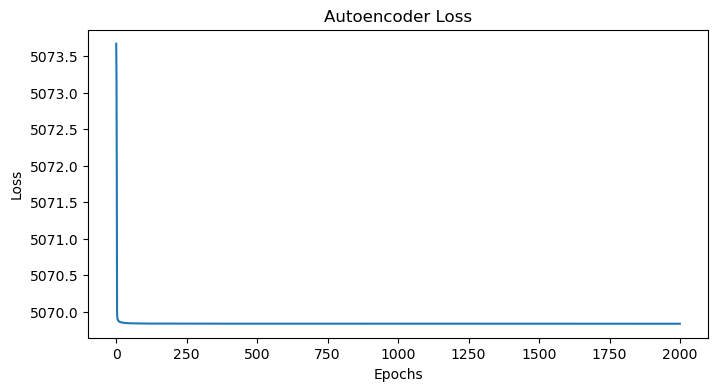

In [188]:
# Reconstruct the input data using the trained autoencoder
reconstructed_data = autoencoder.predict(df)

# Calculate the reconstruction loss
mse = np.mean(np.power(df - reconstructed_data, 2), axis=1)

# Print the mean and standard deviation of the reconstruction loss
print("Mean Squared Error (MSE):", np.mean(mse))
print("Standard Deviation (SD) of MSE:", np.std(mse))

# Plot the loss and accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [189]:
reconstructed_data

array([[0.99747837, 0.999999  , 0.999744  ],
       [0.99998623, 1.        , 0.9999999 ],
       [0.99999994, 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]], dtype=float32)

In [177]:
d2 = {'col1': [2,11], 'col2':[40,220], 'col3':[1,1]}
val = pd.DataFrame(data=d2)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def build_autoencoder(input_dim, encoding_dim):
    # Define the input layer
    input_layer = Input(shape=(input_dim,))
    
    # Define the encoding layers
    encoder_layer1 = Dense(128, activation='relu')(input_layer)
    encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
    encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)
    
    # Define the decoding layers
    decoder_layer1 = Dense(64, activation='relu')(encoder_layer3)
    decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
    decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)
    
    # Create the autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)
    
    return autoencoder

def build_encoder(autoencoder):
    # Extract the encoder part of the autoencoder
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-3].output)
    return encoder

def build_decoder(autoencoder):
    # Extract the decoder part of the autoencoder
    decoder_input = Input(shape=(autoencoder.layers[-3].output_shape[1],))
    decoder_layer = autoencoder.layers[-1](decoder_input)
    decoder = Model(inputs=decoder_input, outputs=decoder_layer)
    return decoder

# Example usage:
input_dim = df.shape[1]  # Number of features in your data
encoding_dim = 2  # Number of nodes in the bottleneck layer

# Build the full autoencoder
autoencoder = build_autoencoder(input_dim, encoding_dim)

# Get the encoder and decoder separately
encoder = build_encoder(autoencoder)
decoder = build_decoder(autoencoder)



In [186]:
input_dim = df.shape[1]  # Number of features in your data
encoding_dim = 64  # Number of nodes in the bottleneck layer (choose a value that is larger than 3)

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layer
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoding layer
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

In [198]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [204]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [199]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Use only the first two features (sepal length and sepal width)
X = X[:, :2]

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


In [200]:
X_train, X_test, _, _ = train_test_split(X_norm, y, test_size=0.2, random_state=42)


In [201]:
input_dim = X_train.shape[1]

# Define the autoencoder architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)


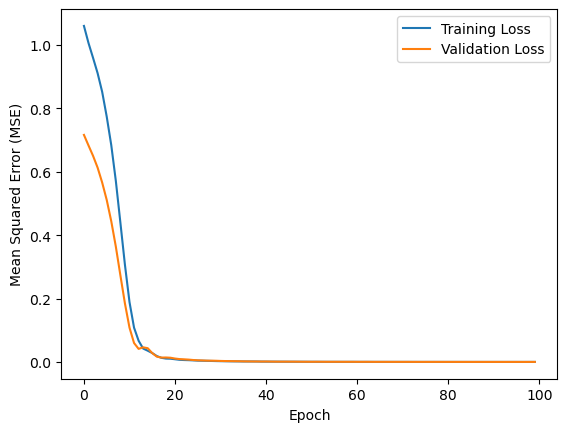

1/1 [==============================] - 0s 12ms/step
Reconstruction Error (MSE): 0.0002807583254957971


In [205]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


# Predict the reconstructed data using the trained autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate the reconstruction error (mean squared error)
mse = mean_squared_error(X_test, X_test_reconstructed)

print(f'Reconstruction Error (MSE): {mse}')


In [203]:
X_train

array([[-1.50652052,  1.24920112],
       [-0.17367395,  3.09077525],
       [ 1.03800476,  0.09821729],
       [-1.26418478,  0.78880759],
       [-1.74885626,  0.32841405],
       [ 0.55333328, -1.28296331],
       [ 0.67450115,  0.32841405],
       [-0.7795133 ,  1.01900435],
       [-1.02184904,  1.24920112],
       [-0.7795133 ,  2.40018495],
       [-0.05250608, -0.82256978],
       [ 0.18982966,  0.78880759],
       [ 1.03800476,  0.09821729],
       [-0.53717756,  1.93979142],
       [-0.53717756,  1.47939788],
       [-0.41600969, -1.51316008],
       [ 0.55333328, -0.59237301],
       [ 0.67450115,  0.09821729],
       [ 0.91683689, -0.13197948],
       [ 1.64384411,  1.24920112],
       [-0.17367395, -0.36217625],
       [ 2.12851559, -0.13197948],
       [-0.29484182, -0.13197948],
       [-0.90068117,  1.01900435],
       [ 2.24968346, -0.59237301],
       [-0.05250608, -0.82256978],
       [-0.7795133 ,  0.78880759],
       [-1.02184904,  1.01900435],
       [-0.90068117,

In [206]:
# Get the encoder part of the autoencoder
encoder = models.Sequential(autoencoder.layers[:3])  # Extract layers up to the bottleneck layer

# Create a decoder model (opposite of the encoder)
decoder_input = layers.Input(shape=(16,))
decoder_output = autoencoder.layers[-3](decoder_input)  # First layer after the bottleneck
decoder_output = autoencoder.layers[-2](decoder_output)
decoder_output = autoencoder.layers[-1](decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# Compile the encoder and decoder models
encoder.compile(optimizer='adam', loss='mean_squared_error')
decoder.compile(optimizer='adam', loss='mean_squared_error')

# ... continue with the rest of the code ...

# Example usage of the encoder and decoder models
encoded_data = encoder.predict(X_test)
decoded_data = decoder.predict(encoded_data)


1/1 [==============================] - 0s 31ms/step


In [207]:
input_dim

2

In [210]:
X_test.shape

(30, 2)

In [211]:
encoded_data.shape

(30, 16)

In [227]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [228]:

california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


In [229]:
X_train, X_test, _, _ = train_test_split(X_norm, y, test_size=0.2, random_state=42)


In [230]:
input_dim = X_train.shape[1]
encoding_dim = 4  # Set the desired encoding dimension to 4 to reduce the dimensions

# Define the autoencoder architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),  # Encoder layer with 4 units to reduce dimensions
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)


In [231]:
# Predict the reconstructed data using the trained autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate the reconstruction error (mean squared error)
mse = mean_squared_error(X_test, X_test_reconstructed)

print(f'Reconstruction Error (MSE): {mse}')


129/129 [==============================] - 0s 617us/step
Reconstruction Error (MSE): 0.019990115564947845


In [232]:
# Create the encoder model that takes 8-dimensional input and outputs 4-dimensional representation
encoder_input = layers.Input(shape=(input_dim,))
encoder_output = autoencoder.layers[2](autoencoder.layers[1](autoencoder.layers[0](encoder_input)))  # The encoder layer
encoder = models.Model(encoder_input, encoder_output)

# Compile the encoder model
encoder.compile(optimizer='adam', loss='mean_squared_error')

# ... continue with the rest of the code ...

# Example usage of the encoder model to reduce dimensions
encoded_data = encoder.predict(X_test)
print(f'Encoded Data shape: {encoded_data.shape}')


129/129 [==============================] - 0s 601us/step
Encoded Data shape: (4128, 4)


129/129 [==============================] - 0s 624us/step
Reconstruction Error (MSE): 0.026033557504554525


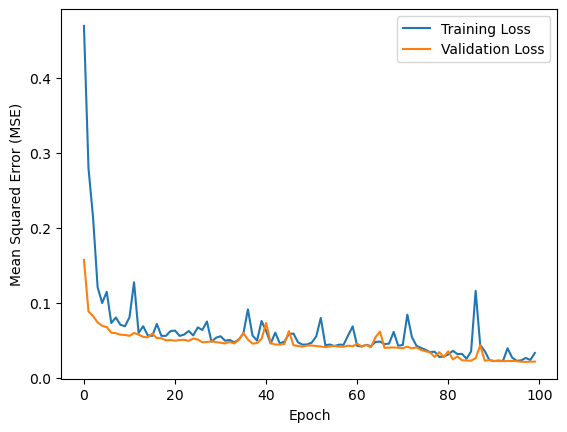

129/129 [==============================] - 0s 542us/step
Encoded Data shape: (4128, 4)


In [234]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the California Housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Build and train the autoencoder with an encoder that reduces the dimensions
input_dim = X_train.shape[1]
encoding_dim = 4  # Set the desired encoding dimension to 4 to reduce the dimensions

# Define the autoencoder architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),  # Encoder layer with 4 units to reduce dimensions
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the autoencoder
X_test_reconstructed = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, X_test_reconstructed)
print(f'Reconstruction Error (MSE): {mse}')

# Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Extract the encoder model that reduces the input dimensions
encoder_input = layers.Input(shape=(input_dim,))
encoder_output = autoencoder.layers[2](autoencoder.layers[1](autoencoder.layers[0](encoder_input)))  # The encoder layer
encoder = models.Model(encoder_input, encoder_output)

# Compile the encoder model
encoder.compile(optimizer='adam', loss='mean_squared_error')

# Example usage of the encoder model to reduce dimensions
encoded_data = encoder.predict(X_test)
print(f'Encoded Data shape: {encoded_data.shape}')

In [239]:
X_test.shape

(4128, 8)

129/129 [==============================] - 0s 615us/step
Reconstruction Error (MSE): 0.022984425430474166


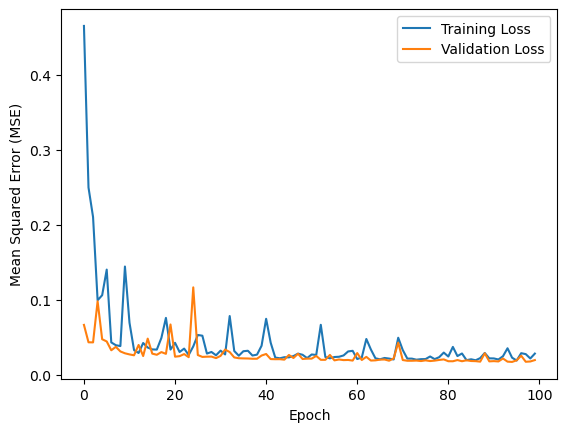

129/129 [==============================] - 0s 557us/step
Encoded Data shape: (4128, 4)


In [257]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the California Housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Build and train the autoencoder with an encoder that reduces the dimensions
input_dim = X_train.shape[1]
encoding_dim = 4  # Set the desired encoding dimension to 4 to reduce the dimensions

# Define the autoencoder architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),  # Encoder layer with 4 units to reduce dimensions
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the autoencoder
X_test_reconstructed = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, X_test_reconstructed)
print(f'Reconstruction Error (MSE): {mse}')

# Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Extract the encoder model that reduces the input dimensions
encoder_input = layers.Input(shape=(input_dim,))
encoder_output = autoencoder.layers[2](autoencoder.layers[1](autoencoder.layers[0](encoder_input)))  # The encoder layer
encoder = models.Model(encoder_input, encoder_output)

# Compile the encoder model
encoder.compile(optimizer='adam', loss='mean_squared_error')

# Example usage of the encoder model to reduce dimensions
encoded_data = encoder.predict(X_test)
print(f'Encoded Data shape: {encoded_data.shape}')


129/129 [==============================] - 0s 615us/step
Reconstruction Error (MSE): 0.024324336959648026


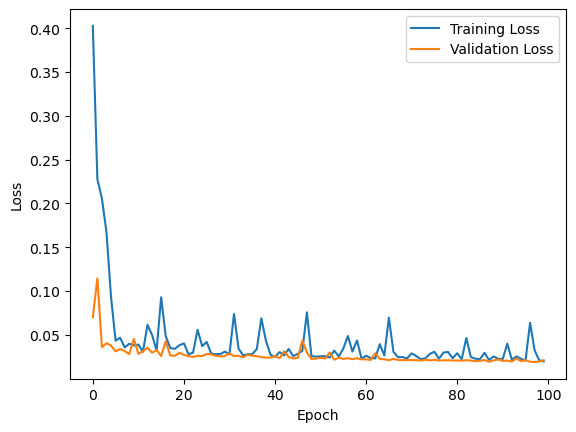

129/129 [==============================] - 0s 546us/step
Encoded Data shape: (4128, 4)


In [292]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

# Load and preprocess the California Housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Remove rows with NaN values from the test set
X_test = X_test[~np.isnan(X_test).any(axis=1)]

# Build and train the autoencoder with an encoder that reduces the dimensions
input_dim = X_train.shape[1]
encoding_dim = 4  # Set the desired encoding dimension to 4 to reduce dimensions

# Define the autoencoder architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),  # Encoder layer with 4 units to reduce dimensions
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# Define the contractive loss function
def contractive_loss(encoder, lam=1e-4):
    def loss_function(y_true, y_pred):
        mse_loss = K.mean(K.square(y_true - y_pred), axis=-1)

        # Compute the gradients of the encoder's output with respect to the input data
        gradients = K.gradients(encoder(y_true), y_true)[0]
        
        # Flatten the gradients and calculate the L2 norm (Frobenius norm)
        gradients_flat = K.batch_flatten(gradients)
        contractive_loss = lam * K.sqrt(K.sum(K.square(gradients_flat), axis=-1))

        # Combine the MSE loss and the contractive loss
        total_loss = mse_loss + contractive_loss

        return total_loss

    return loss_function

# Extract the encoder model that reduces the input dimensions
encoder_input = layers.Input(shape=(input_dim,))
encoder_output = autoencoder.layers[2](autoencoder.layers[1](autoencoder.layers[0](encoder_input)))  # The encoder layer
encoder = models.Model(encoder_input, encoder_output)

# Compile the model with the contractive loss
autoencoder.compile(optimizer='adam', loss=contractive_loss(encoder))

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the autoencoder
X_test_reconstructed = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, X_test_reconstructed)
print(f'Reconstruction Error (MSE): {mse}')

# Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Example usage of the encoder model to reduce dimensions
encoded_data = encoder.predict(X_test)
print(f'Encoded Data shape: {encoded_data.shape}')


A contractive loss function, also known as a contractive autoencoder (CAE), is a modification of the traditional autoencoder that incorporates a penalty term in the loss function to encourage the learned latent space to be more robust to small perturbations in the input data. The primary goal of a contractive autoencoder is to learn a compact representation of the input data while capturing the most relevant and invariant features.

The contractive loss function is designed to minimize the influence of small changes in the input data on the learned latent representation. This property is achieved by adding a regularization term based on the Jacobian matrix of the encoder with respect to the input. The Jacobian matrix measures the sensitivity of the encoding with respect to small changes in the input data.